In [73]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent

# Load Nepal shapefile
shapefile_path = r"E:\Resources\Week 7\GIS Assignment\gis-data-science-assignment-npanerugithub2024\Shape_Data\local_unit.shp"
nepal = gpd.read_file(shapefile_path)

# Raster file path
raster_path1 = r"E:\Resources\Week 7\GIS Assignment\gis-data-science-assignment-npanerugithub2024\nepal_climate_data\nepal_temperature_2020.tif"
raster_path2 = r"E:\Resources\Week 7\GIS Assignment\gis-data-science-assignment-npanerugithub2024\nepal_climate_data\nepal_temperature_2050.tif"

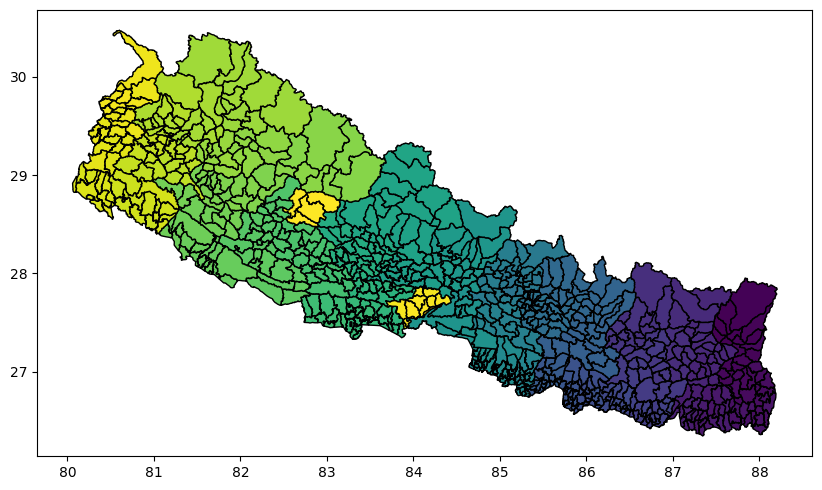

In [38]:
#Visualize vector data
nepal.plot(figsize = (10,6), cmap = 'viridis', edgecolor = 'black')
plt.show()

In [ ]:
#Check Coordinate Reference System:
print("CRS:", nepal.crs)

CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [ ]:
#Print and check vector data
print(nepal.head())

   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  


In [36]:
#Check for missing data:
nepal.isnull().sum()

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

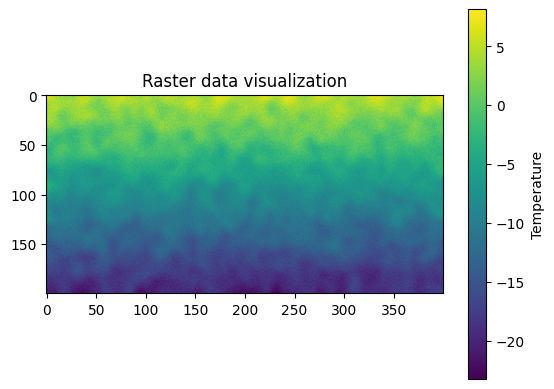

In [44]:
#Visualize raster data
with rasterio.open(raster_path1) as src:
    raster_data = src.read(1)
    plt.imshow(raster_data, cmap = 'viridis')
    plt.colorbar(label = 'Temperature')
    plt.title("Raster data visualization")
    plt.show()

In [ ]:
#Check raster data
print("Shape:", data.shape)         # Shows size (rows x cols)
print("Some sample values:\n", data[:10, :10])  # Print a 10x10 block of values
print(src.meta)

Shape: (200, 400)
Some sample values:
 [[59.81159875 42.728264   18.09058402 46.17956595 40.37808786 38.88888346
  48.59982213 52.46508366 33.70609439 47.96384401]
 [42.48484612 43.53160399 34.99285155 53.41542505 22.14420043 38.92820717
  29.4642711  39.707283   46.62594993 39.07033264]
 [56.67051577 50.17869726 43.34609722 53.07157037 44.4510022  42.07128444
  44.51518689 39.19975238 39.64674201 29.10799539]
 [33.24258705 62.25345017 40.68930931 42.86664979 36.30245663 42.54228893
  42.10827602 41.41683938 43.02739846 26.56920977]
 [54.67013531 47.951137   56.27962781 59.35010669 36.54945211 30.97397552
  36.18360277 34.80188825 46.20962589 31.75547292]
 [34.56939851 47.65588859 62.88656522 31.00738452 32.82245398 41.82216709
  34.65157289 58.34352162 40.60385849 37.04398438]
 [35.64608396 32.1572543  41.24260054 53.40560965 46.44591765 35.4726954
  48.93437437 47.31259861 44.00592531 35.0502159 ]
 [44.99840626 24.09038772 46.88412539 40.73448356 38.78624293 38.08648895
  43.0112034 

In [65]:
# Get number of bands - 12 must represent 12 months
print(src.count)

12


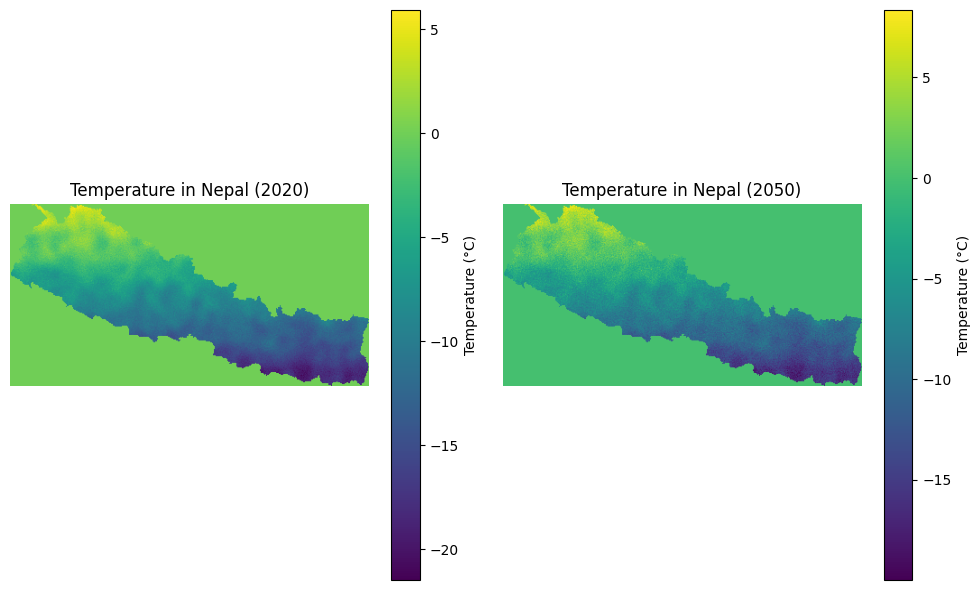

In [59]:
# Combine vector file with raster file
# Function to read and mask the raster
def read_and_mask_raster(raster_path, shapefile):
    with rasterio.open(raster_path) as src:
        shapefile = shapefile.to_crs(src.crs)  # Match CRS of shapefile to raster
        nepal_geom = shapefile.geometry.values # Extract Geometry from the Shapefile
        
        # Mask the raster with Nepal geometry
        data, transform = mask(dataset=src, shapes=nepal_geom, crop=True)
    return data[0], transform


# Read and mask raster for 2020 and 2050
temp_2020, transform_2020 = read_and_mask_raster(raster_path1, nepal)
temp_2050, transform_2050 = read_and_mask_raster(raster_path2, nepal)


# Plot Temperature Maps for 2020 and 2050 side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for 2020
ax = axes[0] #Selecting first subplot
im_2020 = ax.imshow(temp_2020, cmap='viridis', extent=plotting_extent(temp_2020, transform_2020))
plt.colorbar(im_2020, ax=ax, label="Temperature (°C)")
ax.set_title("Temperature in Nepal (2020)")
ax.axis('off')

# Plot for 2050
ax = axes[1]
im_2050 = ax.imshow(temp_2050, cmap='viridis', extent=plotting_extent(temp_2050, transform_2050))
plt.colorbar(im_2050, ax=ax, label="Temperature (°C)")
ax.set_title("Temperature in Nepal (2050)")
ax.axis('off')

plt.tight_layout() #Adjusts spacing between suplots to avoid overlapping
plt.show()




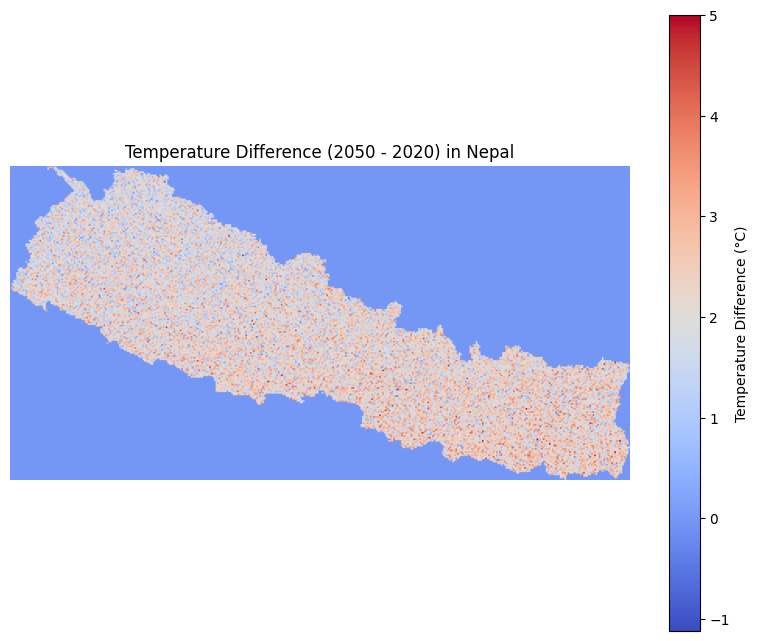

In [57]:
# Calculate the difference (2050 - 2020)
temp_diff = temp_2050 - temp_2020

# Plot the temperature difference (2050 - 2020)
fig, ax = plt.subplots(figsize=(10, 8))
im_diff = ax.imshow(temp_diff, cmap='coolwarm', extent=plotting_extent(temp_diff, transform_2050))
plt.colorbar(im_diff, ax=ax, label="Temperature Difference (°C)")
ax.set_title("Temperature Difference (2050 - 2020) in Nepal")
ax.axis('off')
plt.show()


In [83]:
# --- Basic Statistics ---
# --- Basic Statistics for 2020 ---
print("\n--- Basic Statistics for 2020 ---")
print(f"Min temperature: {np.nanmin(temp_2020):.2f} °C")
print(f"Max temperature: {np.nanmax(temp_2020):.2f} °C")
print(f"Mean temperature: {np.nanmean(temp_2020):.2f} °C")
print(f"Standard deviation: {np.nanstd(temp_2020):.2f} °C")

# --- Basic Statistics for 2050 ---
print("\n--- Basic Statistics for 2050 ---")
print(f"Min temperature: {np.nanmin(temp_2050):.2f} °C")
print(f"Max temperature: {np.nanmax(temp_2050):.2f} °C")
print(f"Mean temperature: {np.nanmean(temp_2050):.2f} °C")
print(f"Standard deviation: {np.nanstd(temp_2050):.2f} °C")


--- Basic Statistics for 2020 ---
Min temperature: -21.48 °C
Max temperature: 5.93 °C
Mean temperature: -3.40 °C
Standard deviation: 5.51 °C

--- Basic Statistics for 2050 ---
Min temperature: -19.98 °C
Max temperature: 8.35 °C
Mean temperature: -2.54 °C
Standard deviation: 4.74 °C


In [84]:
# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [85]:
#Define a function to calculate average monthly temperature within shapefile bounds
def get_avg_monthly_temp(raster_path, shapefile):
    avg_temps = [] #Create an empty list
    with rasterio.open(raster_path) as src:
        shapefile = shapefile.to_crs(src.crs)  # Match projection
        nepal_geom = shapefile.geometry.values     # Extract geometry of the boundary

        for band_index in range(1, 13):  # Loop through 12 monthly bands
            data, _ = mask(src, shapes=nepal_geom, crop=True, indexes=band_index)  # Crops the raster to just the given geometry
            data = data.astype(np.float32) #converts the data type to float32

            # Replace nodata values with NaN
            if src.nodata is not None:
                data[data == src.nodata] = np.nan #Replace nodata values with nan = not a number

            mean_val = np.nanmean(data)  # Calculate mean ignoring NaNs
            avg_temps.append(mean_val) #Adds that month's avg temperature value to the list
    return avg_temps

In [86]:
# Calculate monthly mean temperature for 2020 and 2050
avg_temp_2020 = get_avg_monthly_temp(raster_path1, nepal)
avg_temp_2050 = get_avg_monthly_temp(raster_path2, nepal)

Monthly Average Temperature (°C):
Jan: 2020 = -3.40, 2050 = -2.54
Feb: 2020 = -1.65, 2050 = -0.80
Mar: 2020 = -0.46, 2050 = 0.40
Apr: 2020 = -0.20, 2050 = 0.65
May: 2020 = -0.96, 2050 = -0.10
Jun: 2020 = -2.49, 2050 = -1.63
Jul: 2020 = -4.31, 2050 = -3.45
Aug: 2020 = -5.84, 2050 = -4.98
Sep: 2020 = -6.59, 2050 = -5.74
Oct: 2020 = -6.33, 2050 = -5.48
Nov: 2020 = -5.14, 2050 = -4.29
Dec: 2020 = -3.40, 2050 = -2.54


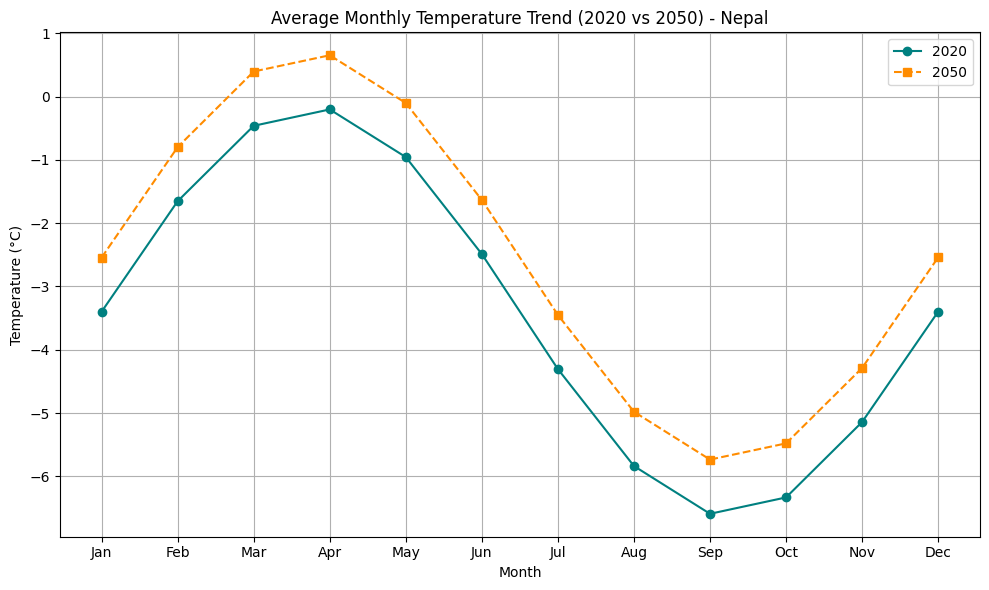

In [87]:
# Print results
print("Monthly Average Temperature (°C):")
for month, t2020, t2050 in zip(months, avg_temp_2020, avg_temp_2050):
    print(f"{month}: 2020 = {t2020:.2f}, 2050 = {t2050:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, avg_temp_2020, marker='o', linestyle='-', label='2020', color='teal')
plt.plot(months, avg_temp_2050, marker='s', linestyle='--', label='2050', color='darkorange')

plt.title('Average Monthly Temperature Trend (2020 vs 2050) - Nepal')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('temperature_trend_nepal_2020_vs_2050.png', dpi=300)
plt.show()


# Summary
The mean temperature increased by nearly 0.86 °C from 2020 to 2050, indicating a warming trend. Maximum temperature increased, showing hotter regions getting warmer in future projections. Minimum temperature also increased slightly, indicating that even the coldest areas may get relatively warmer by 2050. A slightly lower standard deviation in 2050 suggests temperatures may become more uniform across the country.

### Monthly Temperature Trend Plot:

A line graph was created comparing average monthly temperature trends for 2020 and 2050. Consistent increase in monthly temperatures in 2050 compared to 2020.
The greatest temperature rise is noticeable during the pre-monsoon and fall season.
Indicates climate shifts affecting seasonal cycles, potentially impacting agriculture and water resources.